In [1]:
import config
import mysql.connector 
import requests
import json
from bs4 import BeautifulSoup
from mysql.connector import errorcode
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = 'Movies'
)
cursor = cnx.cursor()

In [2]:
cursor.execute("""select  avg(m.budget), avg(m.revenue), avg(m.rating), d.genres
                from  Movies.The_Movie_Db m 
                join Movies.The_Movie_Db_Genres d
                where m.movie_name = d.movie_name group by d.genres;""")
# cursor.fetchall()

In [3]:
df = pd.DataFrame(cursor.fetchall())
df.head()

,0,1,2,3
0,66166666.6667,297674967.2083,7.320833,Crime
1,60534568.6275,279125260.0588,6.717647,Thriller
2,62292054.5455,331911761.0182,7.121818,Drama
3,135446808.5106,603919186.2553,6.908511,Fantasy
4,147851648.3516,678934275.1868,6.905495,Adventure


In [4]:
#create new columns name
df.columns = [ 'budget', 'revenue', 'rank',  'genre' ]

In [5]:
#replace 0 to mean
df.budget =  df.budget.astype(int)
df.revenue = df.revenue.astype(int)
df.revenue = df.revenue.replace(0, df.revenue.mean())
df.budget = df.budget.replace(0, df.budget.mean())
df.revenue = [int(i) for i in df.revenue]
df.budget = [int(i) for i in df.budget]

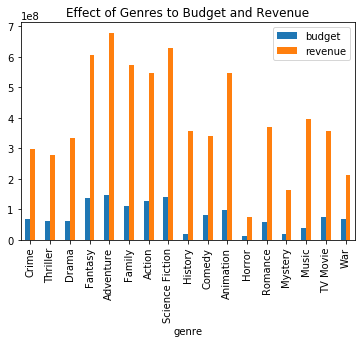

In [6]:
#plot budget and revenue table group by genre
df.plot(x ='genre', y = ['budget', 'revenue'], kind = 'bar', title = 'Effect of Genres to Budget and Revenue')


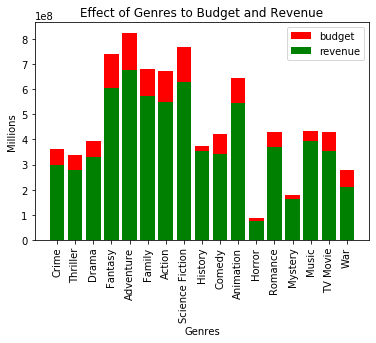

In [7]:
plt.bar(df.genre, df.budget, color = 'red',bottom=df.revenue, label = 'budget')
plt.bar(df.genre, df.revenue, color = 'green', label = 'revenue')
plt.xticks(['Crime', 'Thriller', 'Drama', 'Fantasy', 'Adventure', 'Family', 'Action', 'Science Fiction', 'History', 'Comedy', 'Animation', 'Horror', 'Romance', 'Mystery', 'Music', 'TV Movie', 'War'], rotation=90)
plt.ylabel('Millions')
plt.xlabel('Genres')
plt.title('Effect of Genres to Budget and Revenue')
plt.legend()

plt.show()


In [8]:
#create new column which is profit
df.profit = 100*(df.revenue-df.budget)/df.revenue

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


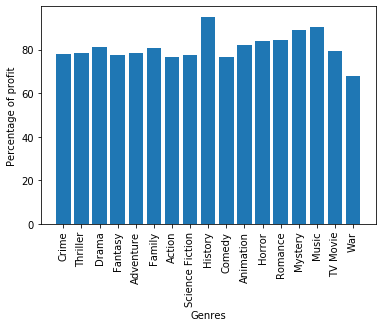

In [9]:
plt.bar(df.genre, df.profit)

plt.xticks(['Crime', 'Thriller', 'Drama', 'Fantasy', 'Adventure', 'Family', 'Action', 'Science Fiction', 'History', 'Comedy', 'Animation', 'Horror', 'Romance', 'Mystery', 'Music', 'TV Movie', 'War'], rotation=90)
plt.ylabel('Percentage of profit')
plt.xlabel('Genres')
# plt.legend()

plt.show()